In [1]:
from MultiLayerFinal import NN
import numpy as np
import random
from scipy.special import expit
from perceptron_object import Perceptron
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = np.loadtxt('sin.csv', delimiter = ',')

In [3]:
Per = Perceptron(data[:,0:2], data[:,2:3], alpha = .001, iteration = 200, test_percentage = .1, binary = True)

192.0


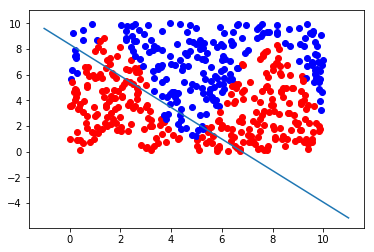

In [4]:
def plot_weights(w):
    x = np.arange(-1,11,.01)
    y = (-w[0]-w[1]*x)/w[2]
    plt.plot(x,y)
plot_weights(Per.weights[1,:])
    
for i in range(0,500):
    if data[i,2] == 1:
        plt.scatter(data[i,0], data[i,1], color = 'blue')
    else:
        plt.scatter(data[i,0], data[i,1], color = 'red')
plt.show()
    

In [5]:
def quadratic(data):
    return np.transpose(np.vstack((data[:,0], data[:, 1], data[:,0]*data[:,1], data[:,0]**2, data[:,1]**2)))

In [6]:
new_data = quadratic(data[:, 0:2])

In [18]:
Per_q = Perceptron(new_data, data[:,2:3], alpha = 1.05, iteration = 3000, test_percentage = .2, binary = True)

170.0


In [19]:
def quad(a,b,c):
    dis = ((abs(b**2-4*a*c))**.5)
    return (-b+dis)/float(2*a)
    

In [20]:
def y(x, w):
    a = w[5]
    b = x*w[3]+w[2]
    c = w[0]+w[1]*x+w[4]*x*x
    return quad(a,b,c)

In [21]:
xs = np.arange(1,10,.1)
ys = y(xs, Per_q.binary_weigths)

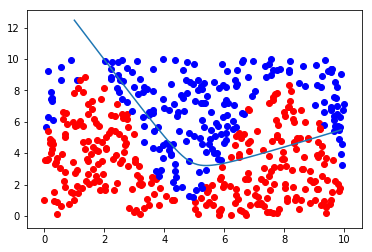

In [22]:
for i in range(0,500):
	if data[i,2] == 1:
		plt.scatter(data[i,0], data[i,1], color = 'blue')
	else:
		plt.scatter(data[i,0], data[i,1], color = 'red')

plt.plot(xs, ys)
plt.show()
    

In [23]:
Per_q.accuracy


0.78000000000000003

In [36]:
x = data[:, 0:2]
y = data[:, 2:3]
a = NN(x, y, hidden_layer_size = 2)
c,d = a.feed_foward(x, a.wh, a.wo, a.bh, a.bo)


In [40]:
w1,w2, bh, bo, errors = a.train(x, y,a.wh, a.wo, a.bh, a.bo, alpha = .06, iter = 30000)


121.734879009 1 Thousand Iterations
124.852466082 2 Thousand Iterations
121.042361143 3 Thousand Iterations
121.104954854 4 Thousand Iterations
119.635604066 5 Thousand Iterations
119.274276631 6 Thousand Iterations
117.629842993 7 Thousand Iterations
116.424177661 8 Thousand Iterations
116.968765205 9 Thousand Iterations
116.843571424 11 Thousand Iterations
116.579184433 12 Thousand Iterations
116.292568076 13 Thousand Iterations
115.990291337 14 Thousand Iterations
115.688926934 15 Thousand Iterations
115.411054162 16 Thousand Iterations
115.175211768 17 Thousand Iterations
114.98907824 18 Thousand Iterations
114.848552614 19 Thousand Iterations
114.674430577 21 Thousand Iterations
114.66315683 22 Thousand Iterations
114.651719216 23 Thousand Iterations
114.64074928 24 Thousand Iterations
114.630211784 25 Thousand Iterations
114.620077341 26 Thousand Iterations
114.610320647 27 Thousand Iterations
114.600919411 28 Thousand Iterations
114.591853671 29 Thousand Iterations


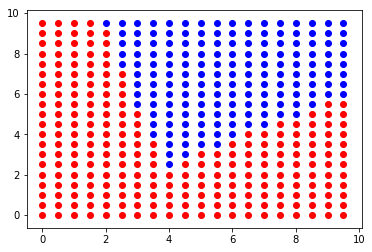

In [41]:
for i in range(0,20):
    it = i/2.0
    itr,b,c = a.test(x, y, a.wh, a.wo, a.bh, a.bo)
    for j in range(0,20):
        jt = j/2.0
        b = a.feed_foward([it, jt], a.wh, a.wo, a.bh, a.bo)
        if b[1]>=.5:
            plt.scatter(it, jt, color = 'blue')
        else: plt.scatter(it, jt, color = 'red')
plt.show()

In [39]:
r,b,c = a.test(x, y, a.wh, a.wo, a.bh, a.bo)
np.sum(r),

(423,)

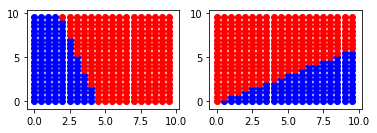

In [51]:
for i in range(1,3):
    plt.subplot(2,2,i)
    for k in range(0,20):
        it = k/2.0
        itr,q,c = a.test(x, y, a.wh, a.wo, a.bh, a.bo)
        for j in range(0,20):
            jt = j/2.0
            r = a.feed_foward([it, jt], a.wh, a.wo, a.bh, a.bo)
            if r[0][0][i-1]>=.5:
                plt.scatter(it, jt, color = 'blue')
            else: plt.scatter(it, jt, color = 'red')
plt.show()

In [71]:
new = NN(x, y, hidden_layer_size = 6)
c,d = new.feed_foward(x, new.wh, new.wo, new.bh, new.bo)

In [77]:
w1,w2, bh, bo, errors = new.train(x, y,new.wh, new.wo, new.bh, new.bo, alpha = .0001, iter = 30000)

17.6445378037 1 Thousand Iterations
17.5297281292 2 Thousand Iterations
17.4245967724 3 Thousand Iterations
17.3340253771 4 Thousand Iterations
17.2507061749 5 Thousand Iterations
17.172127661 6 Thousand Iterations
17.0974609371 7 Thousand Iterations
17.0263557382 8 Thousand Iterations
16.958567813 9 Thousand Iterations
16.8319797232 11 Thousand Iterations
16.7726832397 12 Thousand Iterations
16.7157301749 13 Thousand Iterations
16.6608988539 14 Thousand Iterations
16.6079884255 15 Thousand Iterations
16.5568198696 16 Thousand Iterations
16.5072352966 17 Thousand Iterations
16.4590963223 18 Thousand Iterations
16.4122820411 19 Thousand Iterations
16.3222187532 21 Thousand Iterations
16.2787968758 22 Thousand Iterations
16.2363504812 23 Thousand Iterations
16.1948172327 24 Thousand Iterations
16.1541420413 25 Thousand Iterations
16.1142760292 26 Thousand Iterations
16.0751756484 27 Thousand Iterations
16.0368019343 28 Thousand Iterations
15.9991198735 29 Thousand Iterations


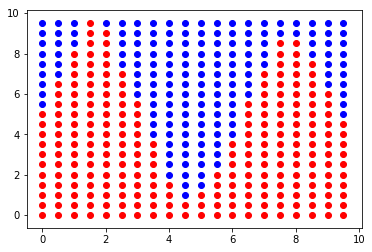

In [78]:
for i in range(0,20):
    it = i/2.0
    itr,b,c = a.test(x, y, new.wh, new.wo, new.bh, new.bo)
    for j in range(0,20):
        jt = j/2.0
        b = new.feed_foward([it, jt], new.wh, new.wo, new.bh, new.bo)
        if b[1]>=.5:
            plt.scatter(it, jt, color = 'blue')
        else: plt.scatter(it, jt, color = 'red')
plt.show()

In [74]:
r,b,c = a.test(x, y, new.wh, new.wo, new.bh, new.bo)
np.sum(r)

440

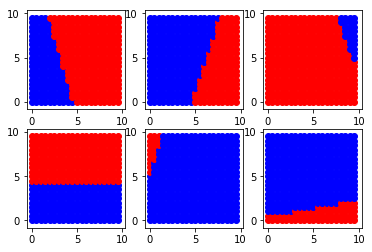

In [80]:
for i in range(1,7):
    plt.subplot(2,3,i)
    for k in range(0,20):
        it = k/2.0
        itr,q,c = new.test(x, y, new.wh, new.wo, new.bh, new.bo)
        for j in range(0,20):
            jt = j/2.0
            r = new.feed_foward([it, jt], new.wh, new.wo, new.bh, new.bo)
            if r[0][0][i-1]>=.5:
                plt.scatter(it, jt, color = 'blue')
            else: plt.scatter(it, jt, color = 'red')
plt.show()

In [83]:
print new.wo

[[-15.25666501]
 [ 12.18921972]
 [  8.98294347]
 [  3.58978003]
 [-15.67255417]
 [  6.11502347]]
